<a href="https://colab.research.google.com/github/fxnnxc/class-MachineLearning/blob/master/Assignment07.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Assignment 07

Logistic regression for a binary classification with a regularization

## I. Code

### 1.Training Data

In [0]:
import numpy as np 
import matplotlib.pyplot as plt

data    = np.genfromtxt("data07.txt", delimiter=',')
pointX  = data[:, 0] 
pointY  = data[:, 1] 
label   = data[:, 2]

pointX0 = pointX[label == 0] 
pointY0 = pointY[label == 0]
pointX1 = pointX[label == 1] 
pointY1 = pointY[label == 1]

### 2. Logistic Regression with a high dimensional feature function

In [0]:
import math
# haperparameters 
tht = [[-1 for i in range(11)] for j in range(11)]
lr = 0.001

def sigmoid(x): #시그모이드 함수
    return 1/(1+np.exp(-x))

def G(x,y): #x,y에 대한 모델 
  g = 0
  for j in range(11):
    for i in range(11):
      g += tht[j][i]*(x**i)*(y**j)
  return g

def calculate_acc(data):#데이터에 대한 정확도 계산
  correct = 0
  for d in data:
    if sigmoid(G(d[0],d[1]))>=1/2:
      if d[2]==1:
        correct +=1
    else:
      if d[2]==0:
        correct +=1
  return correct/len(data)

### 3. Objective Function with a regularization term

In [0]:
lambda1 = 0.000000001
lambda2 = 0.0000001
lambda3 = 0.0001

def loss(data, lamb): #세타값에 대한 데이터의 로스
    Z = [(G(d[0], d[1]) ,int(d[2])) for d in data] # Z값을 미리 계산해둔다. 
    entropy = sum([-z[1]*np.log(sigmoid(z[0]))-(1-z[1])*np.log(1-sigmoid(z[0])) for z in Z])/len(Z)  # 데이터와 세타
    regularization =  lamb * sum([sum([tht[j][i]**2 for i in range(11)]) for j in range(11)])  # Regularization term
    return entropy + regularization

### 4. Gradient Descent

  

In [0]:
def gradient_descent(lamb):
  global tht
  tht_buffer = [[-1 for i in range(11)] for j in range(11)] # 변경 전 세타 값을 저장해서 한 번에 바꾼다. 
  sig = [G(d[0],d[1]) for d in data] # Z값을 미리 계산해둔다. 
  for j in range(11):
    for i in range(11):
      if i==0 and j==0:  # No regularization for theta 0,0
          tht_buffer[0][0] = tht[0][0] - lr* sum([(sig[k] - d[2]) for k,d in enumerate(data)])/len(sig) 
      else:
          tht_buffer[j][i] = tht[j][i]*(1-lr*lamb) - lr*(sum([(sig[k] - d[2])*(d[0]**i)*(d[1]**j) for k,d in enumerate(data)])/len(sig))
  tht = tht_buffer[:] # tht 전역 변수에 업데이트된 세타값 저장

### 5. Training

In [0]:
# Initialize
J1 = []
J2 = []
J3 = []

ACC1 =[]
ACC2 =[]
ACC3 =[]

tht_over = [[[-1 for i in range(11)] for j in range(11)]]
tht_right= [[[-1 for i in range(11)] for j in range(11)]]
tht_under= [[[-1 for i in range(11)] for j in range(11)]]

In [0]:
import datetime

# Training function
def training(lamb,loss_list, acc_list, tht_store):
    global lr,tht
    tht = tht_store[0]
    initial_lr = lr
    stop = 100
    count = 0
    print("Trainig started...")

    while True:

      lr = initial_lr /(1+0.0001*np.sqrt(count+10000))  #learning rate annealing
      gradient_descent(lamb)
      acc_list.append(calculate_acc(data))
      loss_list.append(loss(data, lamb))
      if count >stop : # Convergence
        break
      count+=1
    lr = initial_lr         # Restore Initial Learning Rate
    tht_store[0]=tht

In [374]:
# Training
training(lambda1, J1, ACC1, tht_over ) # Over  - fitting
training(lambda2, J2, ACC2, tht_right) # right - fitting
training(lambda3, J3, ACC3, tht_under) # under - fitting

Trainig started...
Trainig started...
Trainig started...


In [0]:
# Decision Boundary
# For Contour
X_mesh, Y_mesh = np.meshgrid(np.linspace(-1.2,1.2, 100),
                     np.linspace(-1.2, 1.2, 100))

Z = [[],[],[]]
tht_list = [tht_over, tht_right, tht_under]
for i in range(3):
  tht = tht_list[i][0]
  z = G(X_mesh, Y_mesh)
  for z1 in z:
    Z[i].append([sigmoid(z2) for z2 in z1])

### 6. Accuracy

Training을 하면서 Accuracy 또한 계산되며, 이는 ACC리스트에 저장된다. 

## II. Results

### 1. The training data
* label 0 = blue
* label 1 = red

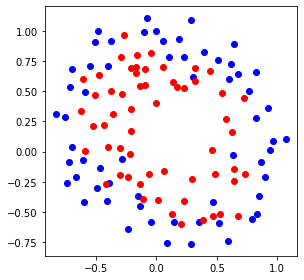

In [376]:
plt.figure()
plt.scatter(pointX0, pointY0, c='b') 
plt.scatter(pointX1, pointY1, c='r') 
plt.tight_layout() 
plt.gca().set_aspect('equal', adjustable='box') 
plt.show()

### 2. training error with varying regularization parameters

* $g(x,y;\theta) = {\sum_{i=0}^{10}} {\sum_{j=0}^{10}}\theta_{i,j} x^iy^j$

* $J(\theta) = {1 \over m }{\sum_{i=0}^{m}} [-l^ilog(\sigma(g(x^i,y^i;\theta))) - (1-l^i)log(\sigma(g(x^i,y^i;\theta)))] + {\lambda \over 2} {\sum_{i=0}^{10}} {\sum_{j=0}^{10}}\theta_{i,j}^2$

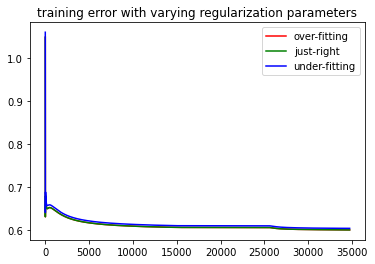

In [377]:
plt.figure()
plt.plot(J1, c='r') 
plt.plot(J2, c='g') 
plt.plot(J3, c='b') 
plt.title('training error with varying regularization parameters')
plt.legend(['over-fitting', 'just-right', 'under-fitting'])
plt.show()

### 3. The values of the chosen regularization parameteres $\lambda$

* $\lambda_1$ :  over-fitting is demonstrated 
* $\lambda_2$ :  just-right is demonstrated 
* $\lambda_3$ :  under-fitting is demonstrated

Text(0.5, 1.0, 'The values of the chosen regularization parameteres')

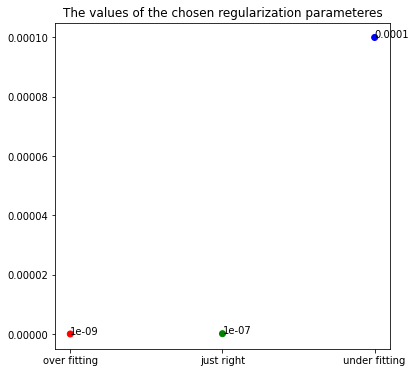

In [378]:
plt.figure(figsize=(6,6))
plt.scatter(['over fitting', 'just right', 'under fitting'], [lambda1,lambda2,lambda3], color=['r','g','b'])
plt.text('over fitting', lambda1 , str(lambda1))
plt.text('just right', lambda2 , str(lambda2))
plt.text('under fitting', lambda3 , str(lambda3))
plt.title('The values of the chosen regularization parameteres')

### 4. The training accuracy with varying regularaization parameters

Accuracy = $Correct \over Total$

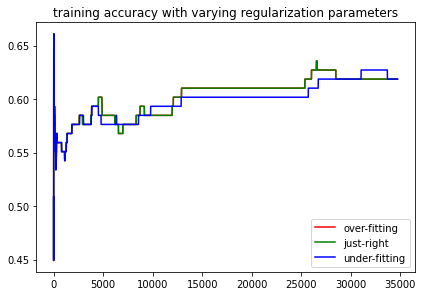

In [379]:
plt.figure()
plt.plot(ACC1, c='r') 
plt.plot(ACC2, c='g') 
plt.plot(ACC3, c='b') 
plt.tight_layout() 
plt.title('training accuracy with varying regularization parameters')
plt.legend(['over-fitting', 'just-right', 'under-fitting'])
plt.show()

### 5.The final training accuracy with varying regularization parameters

Text(0.5, 1.0, 'The final training accuracy with varying regularization parameters')

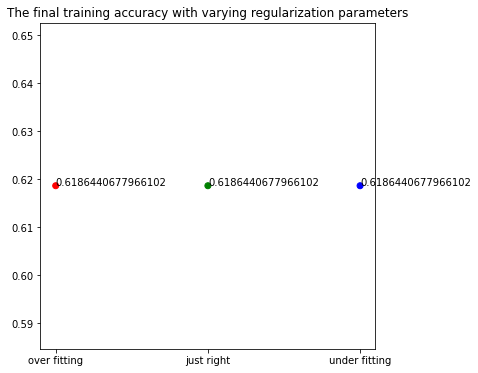

In [380]:
plt.figure(figsize=(6,6))
plt.scatter(['over fitting', 'just right', 'under fitting'], [ACC1[-1], ACC2[-1], ACC3[-1]], color=['r','g','b'])
plt.text('over fitting',ACC1[-1] , str(ACC1[-1]))
plt.text('just right', ACC2[-1], str(ACC2[-1]))
plt.text('under fitting', ACC3[-1] , str(ACC3[-1]))
plt.title('The final training accuracy with varying regularization parameters')

### 6. The optimal classifier with varying regularization parameters superimposed on the training data



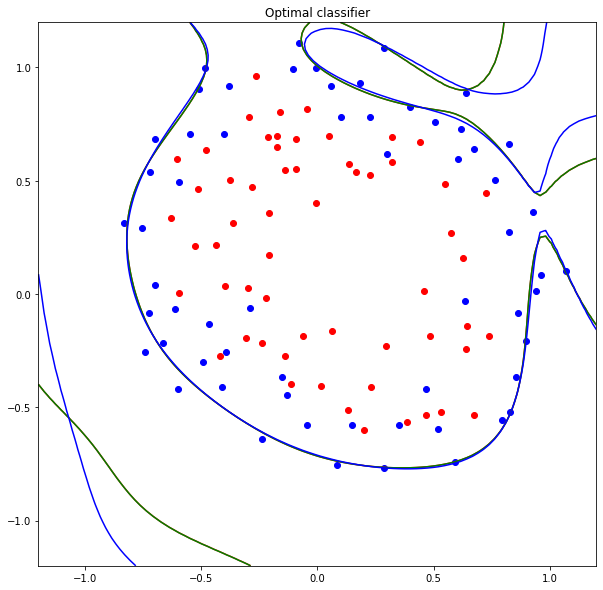

In [381]:
f = plt.figure(figsize=(10,10))
plt.title('Optimal classifier')
plt.scatter(pointX0, pointY0, alpha=1, c='b')
plt.scatter(pointX1, pointY1, alpha=1, c='r')
plt.contour(X_mesh, Y_mesh, Z[0],levels=[0.5],colors='red')   # Over
plt.contour(X_mesh, Y_mesh, Z[1],levels=[0.5],colors='green') # Just right
plt.contour(X_mesh, Y_mesh, Z[2],levels=[0.5],colors='blue')  # Under